# Creating a basic model with PyTorch

## Import Libraries
1. Matplotlib to generate graphs
2. Pandas to work with the data
3. Pytorch to train our model
4. Scikit-learn

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

## Download & prep the Iris Data set

Fisher, R. A.. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.

Linked from https://gist.github.com/curran/

In [2]:
url = '  '

In [3]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# convert the species column to a number
df['species'] = pd.Categorical(df['species']).codes
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Prepare the training data

In [5]:
from os import X_OK
# Split the feature & labels
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

## Create the model

In [6]:
# Create a model class based on nn.Module
class IrisModel(nn.Module):
  # input layer (features)
  # 2 hidden layers (8 nodes / 9 nodes)
  # output layer

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)     # input -> hidden layer 1
    self.fc2 = nn.Linear(h1, h2)              # hidden layer 1 -> hidden layer 2
    self.out = nn.Linear(h2, out_features)    # hidden layer 2 -> output

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

## Instantiate & prepare the model

In [7]:
torch.manual_seed(118)

model = IrisModel()

# Set the measurement criterion, optimizer, & learing rate
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Train the model

In [8]:
epocs = 100
losses = []

for ii in range(epocs):
  y_pred = model.forward(X_train)

  # Measure loss
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if ii % 10 == 0:
    print(f'Epoch: {ii} Loss: {loss}')

  # Back propogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.0034306049346924
Epoch: 10 Loss: 0.7146957516670227
Epoch: 20 Loss: 0.4437832236289978
Epoch: 30 Loss: 0.28345125913619995
Epoch: 40 Loss: 0.16577666997909546
Epoch: 50 Loss: 0.1041317954659462
Epoch: 60 Loss: 0.0812661424279213
Epoch: 70 Loss: 0.07207570225000381
Epoch: 80 Loss: 0.06754730641841888
Epoch: 90 Loss: 0.06486470997333527


## Graph our results

Text(0.5, 0, 'Epochs')

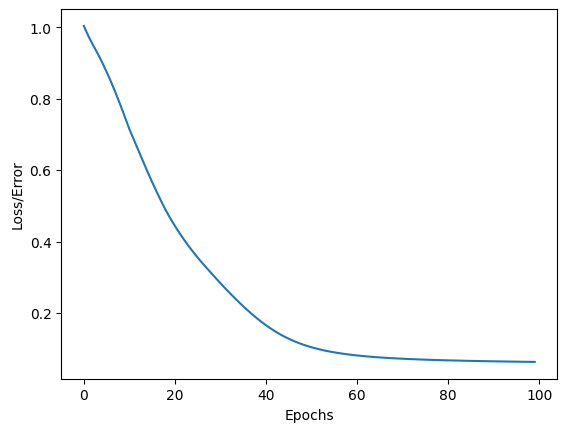

In [9]:
plt.plot(range(epocs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epochs')

## Evaluate the model

In [10]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

print(f'Loss: {loss}')

Loss: 0.0662151351571083


In [11]:
# Classify a new data point
new_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])
with torch.no_grad():
  print(model.forward(new_iris))

tensor([-5.1209,  4.5651,  7.3973])


## Save model for later use

In [12]:
torch.save(model.state_dict(), 'iris_model.pt')

## Work with saved model

In [13]:
new_model = IrisModel()
new_model.load_state_dict(torch.load('iris_model.pt', map_location=torch.device('cpu')), strict=False)  # Add weights_only=True
new_model.eval()

another_iris = torch.tensor([4.9, 3.1, 6.1, 1.3])
with torch.no_grad():
  print(new_model.forward(new_iris))
  print(new_model.forward(another_iris))

tensor([-5.1209,  4.5651,  7.3973])
tensor([-7.7817,  2.5046, 12.6876])


Note that in both cases the 3rd element (index 2) is the largest value, so it would be chosen as the class.